In [1]:
# from src.coverage import *
# from src.config import *
# from src.utils import *
from bsDoctor import *
import cProfile
from importlib import reload

In [2]:
# args = '-b data/SRR19264609.sorted.bam -f genome/hg38.fa -g genome/gencode.v46.annotation.gtf.gz --chr chr20,chr21,chr22 --mt chrM --control chrL'.split(' ')

args = '-b data/SRR19264609.sorted.bam -f genome/hg38.fa -g genome/gencode.v46.annotation.gtf.gz --chr all --mt chrM --control chrL'.split(' ')

desc = "bsDoctor: Quality Diagnosis for Bisulfite-Seq Data"
parser = MyArgumentParser(description=desc)
options = parser.parse_args(args)

check_args(options)
config_params(options)      
config_params_further()

In [3]:
compute_and_plot()

Sampling nuclear chr: 100%|██████████| 272449/272449 [23:06<00:00, 196.55it/s] 


In [16]:
import src.CpG_motif
reload(src.CpG_motif)

<module 'src.CpG_motif' from '/root/bsDoctor/src/CpG_motif.py'>

In [22]:
data['mt_is_covered'], data['lambda_is_covered']

(1, 0)

In [17]:
src.CpG_motif.compt_CpG_motif()

In [24]:
write_report()

In [3]:
# DNA content
compt_plot_DNA_content()

# base and read quality
if data['include_quality']:
    # quality stats       
    quality = Quality()
    params['quality'] = quality
    compt_quality()
    plot_read_length()
    plot_base_quality()
    plot_read_map_quality()
    plot_bar_base_cigar()


In [4]:
# MT
if data['include_mt']:
    compt_MT()
    if data['mt_is_covered'] == 1:
        plot_mt_depth_binning()
        plot_mt_base_error_rate()

# lambda
if data['include_lambda']:
    compt_lambda()
    if data['lambda_is_covered'] == 1:
        plot_lambda_depth_binning()
        plot_lambda_base_error_rate()

# plastid
if data['include_plastid']:
    compt_plastid()
    if data['plastid_is_covered'] == 1:
        plot_plastid_depth_binning()
        plot_plastid_base_error_rate()


Sampling MT:   0%|          | 0/4 [00:00<?, ?it/s]

Sampling control DNA: 100%|██████████| 10/10 [00:00<00:00, 101.22it/s]


In [5]:
compt_quality()

In [5]:
# pangene
if data['include_pangene']:
    pangene_sampling()
    pangene_compt_plot_meth()


Sampling other non-coding genes: 100%|██████████| 1000/1000 [00:09<00:00, 107.36it/s]


In [7]:
import src.bin_chr_wise
reload(src.bin_chr_wise)

<module 'src.bin_chr_wise' from '/root/bsDoctor/src/bin_chr_wise.py'>

In [8]:
nuclear_sampling()

Sampling nuclear chr: 100%|██████████| 14412/14412 [01:01<00:00, 235.65it/s] 


In [9]:
src.bin_chr_wise.compt_chr_and_bin_wise()

In [10]:
import src.whole_genome
reload(src.whole_genome)

<module 'src.whole_genome' from '/root/bsDoctor/src/whole_genome.py'>

In [11]:
src.whole_genome.compt_whole_genome()

In [7]:
# nuclear whole-genome
plot_base_error_rate_by_AT()
plot_theroretical_me_bias()
plot_hist_me()


In [8]:
# CpG strandness
plot_heatmap_stranded_CpG_depth()
plot_bar_CpG_depth_difference()
plot_bar_double_srtanded_cpg()
plot_heatmap_stranded_CpG_meth()
plot_heatmap_stranded_meth_diff()


In [10]:
import src.me_bias
reload(src.me_bias)

<module 'src.me_bias' from '/root/bsDoctor/src/me_bias.py'>

In [12]:
# binning
src.bin_chr_wise.plot_binning_meth()
src.bin_chr_wise.plot_binning_depth()

In [13]:
# me bias
src.me_bias.plot_me_vs_depth_eq_k()
src.me_bias.plot_me_vs_depth_ge_k()
src.me_bias.plot_me_vs_missing()

In [73]:
src.me_bias.plot_me_and_covrate_vs_cytosine_density()

In [13]:
import src.depth_bias
reload(src.depth_bias)

<module 'src.depth_bias' from '/root/bsDoctor/src/depth_bias.py'>

In [83]:
src.depth_bias.plot_covrate_vs_depth_of_cytosine()

In [96]:
src.depth_bias.plot_covrate_vs_depth_of_whole_genome()

In [95]:
src.depth_bias.plot_depth_dist_of_whole_genome()

In [97]:
src.depth_bias.plot_depth_watson_vs_crick()

In [98]:
src.depth_bias.plot_depth_overall_vs_me()

In [89]:
# depth bias
src.depth_bias.plot_depth_vs_cytosine_density()
src.depth_bias.plot_depth_dist_by_low_high_me()
src.depth_bias.plot_depth_dist_of_cytosine()


In [13]:
import src.CpG_motif
reload(src.CpG_motif)

<module 'src.CpG_motif' from '/root/bsDoctor/src/CpG_motif.py'>

In [14]:
src.CpG_motif.compt_CpG_motif()

In [20]:
src.CpG_motif.plot_hist_CpG_motif_freq()

In [21]:
src.CpG_motif.plot_CpG_motif_freq_watson_vs_crick()

In [22]:
src.CpG_motif.plot_CpG_motif_me_watson_vs_crick()

In [23]:
src.CpG_motif.plot_CpG_motif_depth_vs_freq()

In [24]:
src.CpG_motif.plot_CpG_motif_me_vs_freq()

In [30]:
src.CpG_motif.plot_CpG_motif_covrate_vs_depth()

In [37]:
src.CpG_motif.plot_CpG_motif_me_vs_depth()

In [15]:
import src.RRBS


reload(src.RRBS)

<module 'src.RRBS' from '/root/bsDoctor/src/RRBS.py'>

In [16]:
src.RRBS.compt_RRBS()

In [55]:
src.RRBS.plot_RRBS_CpG_motifs()

In [17]:
import src.saturation_curve_and_DNA_lost
reload(src.saturation_curve_and_DNA_lost)

<module 'src.saturation_curve_and_DNA_lost' from '/root/bsDoctor/src/saturation_curve_and_DNA_lost.py'>

In [18]:
src.saturation_curve_and_DNA_lost.compt_plot_DNA_composition()

In [19]:
src.saturation_curve_and_DNA_lost.plot_saturation_curve()

In [32]:

d = params['dict_cgkmer']
nw = np.array([x.nW for _, x in d.items()])

In [34]:
nw.min()

np.int64(58)

(array([51., 99., 49., 30.,  9.,  7.,  1.,  1.,  6.,  3.]),
 array([  58. ,  322.3,  586.6,  850.9, 1115.2, 1379.5, 1643.8, 1908.1,
        2172.4, 2436.7, 2701. ]),
 <BarContainer object of 10 artists>)

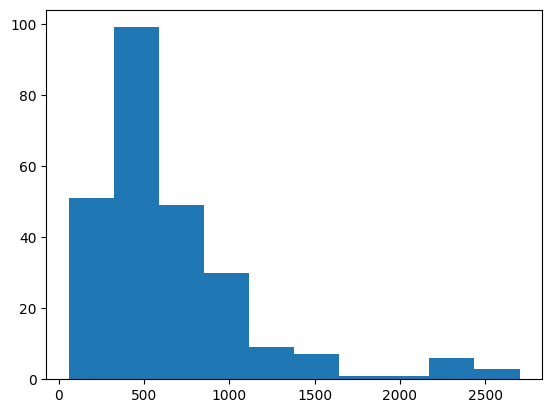

In [33]:
plt.hist(nw)